In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn

class Paras(object):
    learning_rate = 0.01
    batch_size = 32
    gamma = 0.99
    buffer_capacity = 100000
    niteration = 100
    agent_hist = 4

    init_epsilon = 1
    final_epsilon = 0.1
    epsilon_decay = 1/100000

    env = gym.make("SpaceInvaders-v0")
    input_shape = env.observation_space.shape[0]
    action_num = env.action_space.n
    action_shape = 0 if isinstance(env.action_space.sample(), int) else env.action_space.sample.shape
    


class DQN():
    def __init__(self):
        self.lr = Paras.learning_rate
        self.gamma = Paras.gamma
        
        self.epsilon = self.init_epsilon = Paras.init_epsilon
        self.final_epsilon = Paras.final_epsilon
        self.epsilon_decay = Paras.epsilon_decay

        self.buffer_counter = 0
        self.buffer_cur = 0
        if Paras.action_shape == 0:
            self.buffer = np.zeros((Paras.buffer_capacity, 1+1+2*Paras.input_shape))
        else:
            self.buffer = np.zeros((Paras.buffer_capacity, 1+2*Paras.input_shape+Paras.action_shape.sum()))
        
        self.optimizer = None
        self.loss_func = nn.MSELoss("mean")

In [3]:
env = Paras.env

(210, 160, 3)


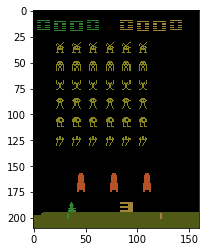

In [16]:
env.reset()
state = env.step(1)[0]
print(state.shape)
plt.imshow(state)

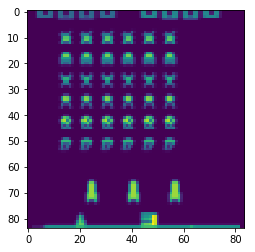

In [43]:
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.Grayscale(1), 
    transforms.Resize((96, 80)), 
    transforms.CenterCrop(84),
#     transforms.ToTensor(), 
])
new = preprocess(Image.fromarray(state))
# new = new.numpy()
# new = np.transpose(new, (1, 2,0))
# new.shape
# plt.imshow(new[:, :, 0])
new = np.asarray(new)
plt.imshow(new)